Xwres prin to katharisma:  526
Xwres meta to katharisma:  101


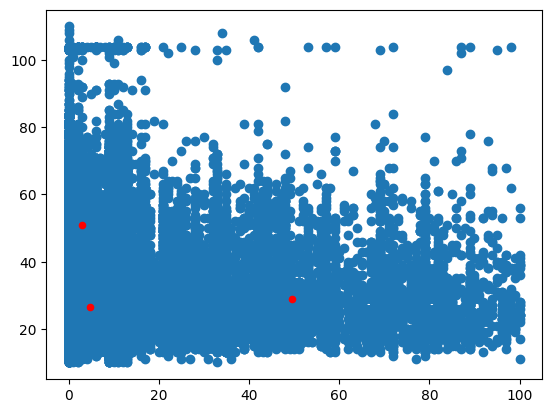

Dimiourgithika 3 cluster xrhstwn me plithos: 
Cluster 1:  39987
Cluster 2:  73292
Cluster 3:  7557

------RATINGS------- 
All ratings:  42708
Non zero ratings:  26083
Zero ratings:  16625


/var/folders/gm/dk17bx292yz59cjk3jzxtcz40000gn/T/ipykernel_33770/1813426597.py:130: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x in clust_2_users_ratings['isbn'].values and (x in books_rat_clust2) == False:
/var/folders/gm/dk17bx292yz59cjk3jzxtcz40000gn/T/ipykernel_33770/1813426597.py:120: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x in clust_1_users_ratings['isbn'].values and (x in books_rat_clust1) == False :
/var/folders/gm/dk17bx292yz59cjk3jzxtcz40000gn/T/ipykernel_33770/1813426597.py:137: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x in clust_3_users_ratings['isbn'].values and (x in books_rat_clust3) == False:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as exp

data = pd.read_csv('BX-Users.csv')
ratings = pd.read_csv('BX-Book-Ratings.csv')

# Katharismos twn ratings apo touw xristes pou den ufistantai sto user dataset kai den tha uparksoun oute sta cluster

# Katharismos pairnontas tin tomi twn User uids kai Rating uids
uids = list(set(ratings.uid).intersection(set(data.uid)))
ratings = ratings[ratings.uid.isin(uids)]

# Second option katharismos me merge
#ratings = pd.merge(ratings, data, how='inner', on='uid')

#---katharismos tou column location gia na meinei mono h xwra---
data.location = data.location.apply(lambda x: x.split(', ')[-1])

# clear people above 110 age
data = data.query("age >= 10 and age <= 110")

#---katharismos twn countries kathws uphrxan mesa mi uparktes xwres.---
unique_countries = data['location'].unique()
#arxikos arithmos xwrwn
print("Xwres prin to katharisma: ", len(unique_countries))

#---diagrafi twn xwrwn pou emfanizontai ligoteres apo 15 fores kathws opws eidame den einai egkyres
location_freq = data.location.value_counts()
invalid_countries = location_freq[location_freq < 15].index
data = data[~data.location.isin(invalid_countries)]

unique_countries = data['location'].unique()
print("Xwres meta to katharisma: ", len(unique_countries))

#vazoume gia kathe xwra ena monadiko arithmo gia na perasei sto model
for country in unique_countries:
    #print(country, np.where(unique_countries == country)[0][0])
    data['location'] = data['location'].replace(country, np.where(unique_countries == country)[0][0])

#dropparoume tis Nan times gia na mporei na mpei sto kmean model
data = data.dropna()

# proetoimasia montelou
X = np.array(data.loc[:,['location', 'age']])
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)

# to model einai ta labels gia to pou anikei o kathe user
model = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=20,     # Set centroid size
            c='red')  # Set centroid color
plt.show()
 

# enallagh pali se xwres anti gia arithmous gia na proxwrisoume se diaxwrismo
for country in unique_countries:
    data['location'] = data['location'].replace(np.where(unique_countries == country)[0][0], country) 


data = data.reset_index(drop=True)

#eisagoume neo column sta data me to se poio cluster anikei o kahte user
data['cluster'] = model

# edw ksexwrizoyme tous users me vasi to cluster pou tous anatehike
clust_1 = data[data['cluster'] == 0]
clust_2 = data[data['cluster'] == 1]
clust_3 = data[data['cluster'] == 2]

print('Dimiourgithika 3 cluster xrhstwn me plithos: ')
print('Cluster 1: ', len(clust_1))
print('Cluster 2: ', len(clust_2))
print('Cluster 3: ', len(clust_3))


#---------------------RATINGS PART-----------------------------------------

# Apo ola ta ratings einai auta poy einai midenika
zero_ratings = ratings[ratings['rating'] == 0]
zero_ratings = zero_ratings.reset_index(drop=True)

# Apo ola ta ratings einai ta non zero 
non_zero_ratings = ratings[ratings['rating'] != 0]
non_zero_ratings = non_zero_ratings.reset_index(drop=True)

print('\n------RATINGS------- ')
print('All ratings: ' ,len(ratings))
print('Non zero ratings: ', len(non_zero_ratings))
print('Zero ratings: ' , len(zero_ratings))

# Einai oi non_zero kritikes twn users tou kathe cluster apo tis opoies tha bgoun oi MO
clust_1_users_ratings = pd.merge(clust_1, non_zero_ratings, how='inner', on='uid')
clust_2_users_ratings = pd.merge(clust_2, non_zero_ratings, how='inner', on='uid')
clust_3_users_ratings = pd.merge(clust_3, non_zero_ratings, how='inner', on='uid')

#clust_1_users_ratings.head()


# edw tha einai o MO vathmoligion tou kahte vivliou gia to kathe cluster pou tha upologistoun apo katw
books_rat_clust1 = np.empty((0, 2), int)
books_rat_clust2 = np.empty((0, 2), int)
books_rat_clust3 = np.empty((0, 2), int)


# Ypologismos MO kathe vivliou sto kathe cluster kai eisagwgh se antistoixo pinaka me touw mesous orous
for book in range(len(zero_ratings)):
    
    # etsi pairno me tin seira isbn apo ta zero
    x = zero_ratings.iloc[book]['isbn']
    
    # elegxei an yparxei to isbn sta non zero 
    if x in clust_1_users_ratings['isbn'].values and (x in books_rat_clust1) == False : 
        # edw vazo se ena neo dataframe oles tis vathmologies twn allwn users gia to biblio
        ongoing_book_rating=clust_1_users_ratings[clust_1_users_ratings['isbn'] == x]
        # vrisko tin mesi timi giauto to vivlio gia tous user pou to exoun vathmologisei
        mean=ongoing_book_rating['rating'].mean()
        mean = round(mean)
        # vazoume sto array to isbn kai dipla ton meso oro twn vathmologiwn tou cluster
        books_rat_clust1=np.append(books_rat_clust1, np.array([[x, mean]]), axis=0)

    # antistoixa gia to deutero cluster
    if x in clust_2_users_ratings['isbn'].values and (x in books_rat_clust2) == False: 
        ongoing_book_rating=clust_2_users_ratings[clust_2_users_ratings['isbn'] == x]
        mean=ongoing_book_rating['rating'].mean()
        mean = round(mean)
        books_rat_clust2=np.append(books_rat_clust2, np.array([[x, mean]]), axis=0)

    # antistoixa gia to trito cluster
    if x in clust_3_users_ratings['isbn'].values and (x in books_rat_clust3) == False:
        ongoing_book_rating=clust_3_users_ratings[clust_3_users_ratings['isbn'] == x]
        mean=ongoing_book_rating['rating'].mean()
        mean = round(mean)
        books_rat_clust3=np.append(books_rat_clust3, np.array([[x, mean]]), axis=0)        



In [2]:
#print(len(books_rat_clust1))
#print(len(books_rat_clust2))
#print(len(books_rat_clust3))

# pairno mia mia tis midenikes kritikes
for x in range(len(zero_ratings)):
    user = zero_ratings.iloc[x]['uid']
    isbn = zero_ratings.iloc[x]['isbn']

    # elegxos an o user anikei sto cluster1 kai an to vivlio exei vathmologithei apo allous xristes tou cluster 1
    if user in clust_1['uid'].values and isbn in books_rat_clust1 :
        book_potition = np.where(books_rat_clust1 == isbn)
        index = book_potition[0][0]
        zero_ratings.at[x, 'rating'] = books_rat_clust1[index][1]

    # antistoixa gia ta alla cluster
    elif user in clust_2['uid'].values and isbn in books_rat_clust2 :
        book_potition = np.where(books_rat_clust2 == isbn)
        index = book_potition[0][0]
        zero_ratings.at[x, 'rating'] = books_rat_clust2[index][1]

    elif user in clust_3['uid'].values and isbn in books_rat_clust3 :
        book_potition = np.where(books_rat_clust3 == isbn)
        index = book_potition[0][0]
        zero_ratings.at[x, 'rating'] = books_rat_clust3[index][1]

        



In [8]:
# epanenosi me to non zero ratings gia na ta apothikeusoyme wste na xrisimopoiithoun
updated_ratings = pd.concat([non_zero_ratings, zero_ratings])
updated_ratings = updated_ratings.reset_index(drop=True)

# apothikeusi sto working directory
#updated_ratings.to_csv('Updated-Ratings.csv')
print("New ratings is saved. ")

updated_ratings.reset_index(drop=True)
print(updated_ratings)

print(updated_ratings.dtypes)



New ratings is saved. 
          uid        isbn rating
0      123629  0002005018      9
1      198013  0399135782      7
2      212449  0399135782      8
3      252921  0399135782      8
4       12923  0440234743     10
...       ...         ...    ...
42703  277831  0786811358      0
42704  277834  0847817741      0
42705  278714  0896101932      0
42706  278789  1413702783      0
42707  278849  0920656307      0

[42708 rows x 3 columns]
uid        int64
isbn      object
rating    object
dtype: object
